# ML for Time Series

## A Unified Framework for Structured Graph Learning via Spectral Constraints

Baptiste Collet - Cyril Miras

## Experiments

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skd
import sklearn.metrics as skm
from learnGraphTopology import *

In [2]:
def A_to_L(A):
    D=np.diag(np.sum(A,axis=0))
    return D-A

## Denoising a multi-component graph

First, we use the spectralGraphTopology to denoise laplacian matrices polluted with noise. We generate a 4 components adjacency matrix.

In [3]:
n_class_feats = 5
n_classes = 4
n_feats = n_classes * n_class_feats
prob_intra = 1
prob_extra = 0.3
max_weight_intra = 1
max_weight_extra = 0.3

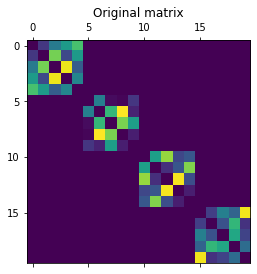

In [4]:
adj = np.zeros((n_feats, n_feats))
for i in range(n_classes):
    i_start = i * n_class_feats
    i_end = i_start + n_class_feats
    for ii in range(i_start, i_end):
        for jj in range(ii+1, i_end):
            adj[ii, jj] = np.random.binomial(n=1, p=prob_intra) * np.random.uniform(high=max_weight_intra)
plt.matshow(adj+adj.T)
plt.title("Original matrix")
plt.show()

We add noise to the matrix

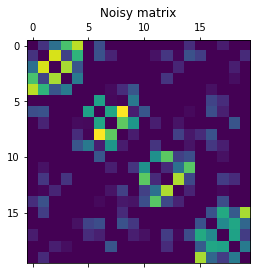

In [5]:
for i in range(n_feats):
    for j in range(i+1, n_feats):
        adj[i, j] += np.random.binomial(n=1, p=prob_extra) * np.random.uniform(high=max_weight_extra)
adj = adj + adj.T
plt.matshow(adj)
plt.title("Noisy matrix")
plt.show()

We generate the data according to the noisy laplacian and learn a denoise laplacian corresponding to a 4 components matrix

In [6]:
n_samples = 100 * n_feats
# compute the laplacian and correlation matrices
lap = np.diag(adj.sum(axis=0)) - adj
theta = np.linalg.pinv(lap)
# generate samples
x = np.random.multivariate_normal(np.zeros(n_feats), theta, size=n_samples).T

In [7]:
# learn the laplacian and adjacency matrices
res_denoising = learn_k_component_graph(x, k=4, maxiter=10000)
if res_denoising['convergence']: print("The optimization converged!")

  1%|█▋                                                                                                                                                               | 105/10000 [00:00<00:33, 298.73it/s]

The optimization converged!


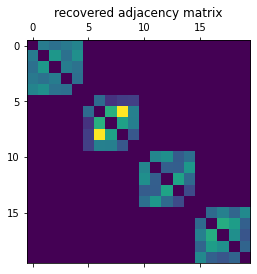

relative error:  0.6511894671427373
naive relative error:  0.09260376587545334


In [8]:
plt.matshow(res_denoising["Adjacency"])
plt.title("recovered adjacency matrix")
plt.show()
print('relative error: ', np.linalg.norm(res_denoising["Laplacian"] - lap)/np.linalg.norm(lap))
print('naive relative error: ', np.linalg.norm(np.linalg.pinv(np.cov(x)) - lap)/np.linalg.norm(lap))

We show the computed laplacian: the components are well retrieved, but the coefficients have been modified during the process.

# Denoising a bipartite graph

Now, we test it on a bipartite graph structure.

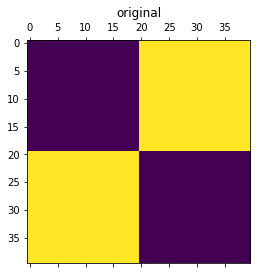

Text(0.5, 1.0, 'noisy')

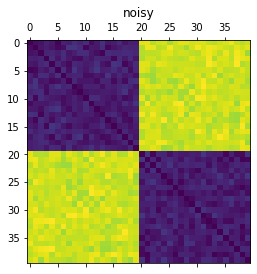

In [9]:
halfnodes=20
nodes=2*halfnodes
A = np.zeros([halfnodes*2,halfnodes*2])

A[halfnodes:,:halfnodes] = 1
plt.matshow(A+A.T)
plt.title("original")
plt.show()
A+=np.random.rand(nodes,nodes)*0.1
for k in range(nodes):
    A[k][k]=0
A+=A.T
L=A_to_L(A)
plt.matshow(A)
plt.title("noisy")

  0%|                                                                                                                                                                    | 1/10000 [00:00<24:31,  6.80it/s]/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spect

  0%|▊                                                                                                                                                                 | 50/10000 [00:00<00:40, 243.50it/s]/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spec

/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
  1%|█▌                                                                                                                                                                | 94/10000 [00:00<00:30, 322.11it/s]/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spectralGraphTopology/ObjectiveFunction.py:18: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(np.linalg.eigh(Lw+J)[0]+eps)+np.diagonal(K@Lw))
/home/bcollet/Documents/spect

  1%|██▏                                                                                                                                                              | 135/10000 [00:00<00:32, 305.07it/s]


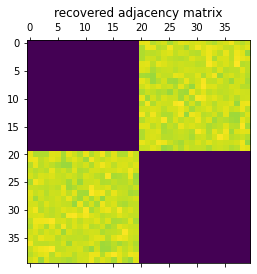

[[0.         0.         0.         ... 1.08736198 1.06524905 1.10090916]
 [0.         0.         0.         ... 1.14141356 1.10750795 1.13928003]
 [0.         0.         0.         ... 1.16401517 1.13326391 1.01405287]
 ...
 [1.08736198 1.14141356 1.16401517 ... 0.         0.         0.        ]
 [1.06524905 1.10750795 1.13326391 ... 0.         0.         0.        ]
 [1.10090916 1.13928003 1.01405287 ... 0.         0.         0.        ]]


In [10]:
di=learn_bipartite_graph(np.linalg.pinv(L),maxiter=10000)
plt.matshow(di["Adjacency"])
plt.title("recovered adjacency matrix")
plt.show()
print(di["Adjacency"])

This time, not only the learned matrix has the desired structure, but it also has similar coefficients to the original one.

## Popular synthetic datasets

In [11]:
def dist_mat_exp_kernel(x, sigma=1, eps=1, k=None):
    n, d = x.shape
    dist_mat = np.zeros((n, n))
    for i in range(n):
        dist_mat[i] = np.exp(-np.linalg.norm(x[i] - x, axis=1)/eps)
    if not k is None:
        for i in range(n):
            k_th_nearest_dist = np.sort(dist_mat[i])[-k]
            dist_mat[i][dist_mat[i] < k_th_nearest_dist] = 0
        dist_mat = 0.5*(dist_mat + dist_mat.T)
    else:
        dist_mat[dist_mat<eps] = 0
    return dist_mat

We load the "two moons" dataset

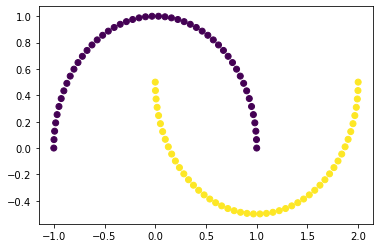

In [12]:
n_samples = 100
moons_data, moons_labels = skd.make_moons(n_samples=n_samples)
plt.scatter(moons_data.T[0], moons_data.T[1], c=moons_labels)
plt.show()

In [13]:
C_moons = dist_mat_exp_kernel(moons_data, sigma=1, eps=0.1)

We learn the graph with two components in order to find the clusters.

In [14]:
res_moons = learn_k_component_graph(C_moons, k=2, maxiter=2000) #2000 or more in reality

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 712.52it/s]


Then, we use the first eigenvalue as hte classying metric and compute the AUC score.

In [15]:
score_moons = np.linalg.eigh(res_moons["Laplacian"])[1][:, 1]
print("AUC score of the spectral classifier", skm.roc_auc_score(moons_labels, score_moons))

AUC score of the spectral classifier 0.5224


We display the adjacency matrix, which is block diagonal and contains the two expected components.

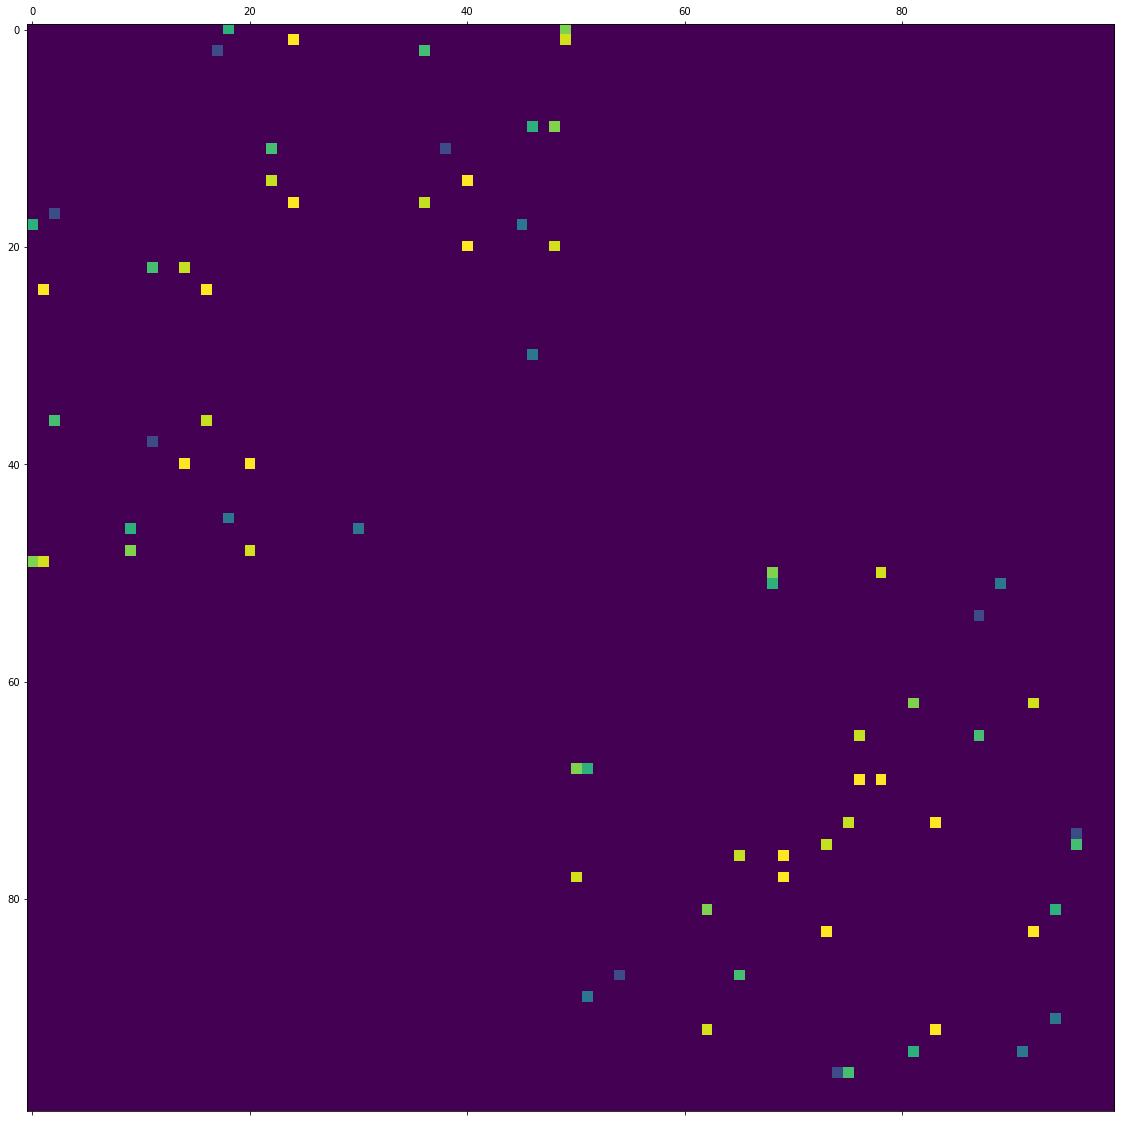

In [16]:
id_moons = np.argsort(moons_labels)
fig = plt.figure(figsize=(20, 20))
plt.matshow(res_moons["Adjacency"][id_moons][:, id_moons], fignum=0)
plt.show()

Then, we load the "two circles" dataset:

In [17]:
def at_least_k_component(L,k):
    la,M=np.linalg.eigh(L)
    la[:k] = 0
    return M@np.diag(la)@M.T

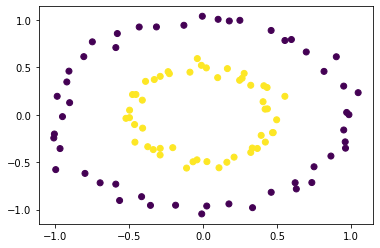

In [44]:
n_samples = 100
circles_data, circles_labels = skd.make_circles(n_samples=n_samples,noise=0.05,factor=0.5)
plt.scatter(circles_data.T[0], circles_data.T[1], c=circles_labels)
plt.show()

We learn the clusters with the spectralGraphTopology package, however it doesn't always work

In [45]:
C_circles = dist_mat_exp_kernel(circles_data, k=7,sigma=0.1)
res_circles = learn_k_component_graph(C_circles, k=2, maxiter=10000) #2000 or more in reality

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:14<00:00, 673.90it/s]


In [20]:
print(res_circles["convergence"])

False


In [21]:
#res_circles["Laplacian"]=at_least_k_component(res_circles["Laplacian"],k=2)

In [46]:
print(nb_connected_component(res_circles["Laplacian"]))

2


In [47]:
print(np.array([[0.3,0.02],[0.02,0.3]]).round(1))
np.linalg.eigh(res_circles["Laplacian"])[0][1]

[[0.3 0. ]
 [0.  0.3]]


1.0583339246881292e-15

We display the AUC of the second eigenvalue classifier and the distribution of the corresponding scores according to the true label.

In [48]:
score_circles = np.linalg.eigh(res_circles["Laplacian"])[1][:, 1]
print("AUC score of the spectral classifier", skm.roc_auc_score(circles_labels, score_circles))

AUC score of the spectral classifier 1.0


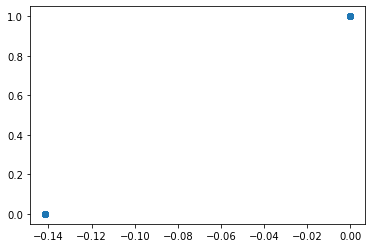

In [49]:
plt.scatter(score_circles, circles_labels)

And here is the learned adjacency matrix:

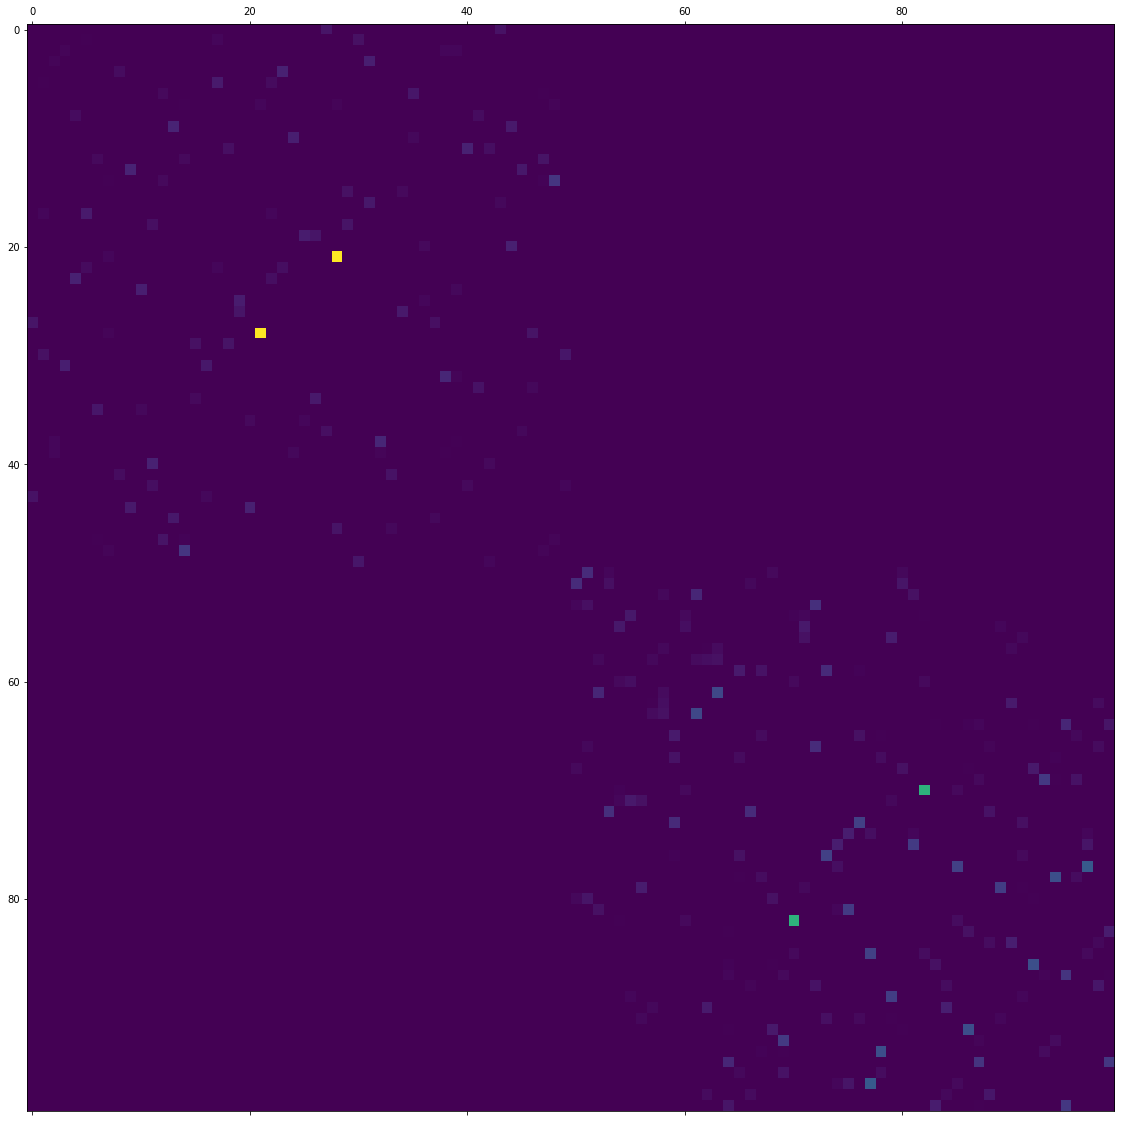

In [26]:
id_circles = np.argsort(circles_labels)
fig = plt.figure(figsize=(20, 20))
plt.matshow(res_circles["Adjacency"][id_circles][:, id_circles], fignum=0)
plt.show()

In [27]:
A=res_circles["Adjacency"][id_circles][:, id_circles]
print(np.max(A[60:,:40]),np.max(A[:40,60:]))
print(np.max(A))

0.02830183350622168 0.02830183350622168
63.57896549250009


Here are unused functions to generate the helix_3D and the three_circles datasets:

In [28]:
def helix_3D(n_samples, h=20, angle=np.pi/2):
    labels=np.array([0]*(n_samples//2)+[1]*((n_samples+1)//2))
    np.random.shuffle(labels)
    ha = np.random.rand(n_samples)*h
    return np.array([[np.cos(a+b),np.sin(a+b),a] for a,b in zip(ha,labels)]),labels

In [29]:
def three_circles(n_samples,factor=0.5):
    labels=np.zeros([n_samples])
    labels[-n_samples//3:]=2
    labels[n_samples//3:-n_samples//3]=1
    np.random.shuffle(labels)
    angles= np.random.rand(n_samples)*2*np.pi
    print(angles,labels)
    return np.array([[np.cos(a)*factor**b,np.sin(a)*factor**b] for a,b in zip(angles,labels)]),labels

In [30]:
print(three_circles(6))

[4.90922958 1.21742831 0.86699066 6.277438   0.69506555 1.39813885] [0. 1. 2. 1. 0. 2.]
(array([[ 0.19557192, -0.98068936],
       [ 0.17302984,  0.46910625],
       [ 0.16178094,  0.19059624],
       [ 0.49999174, -0.00287364],
       [ 0.76801172,  0.64043579],
       [ 0.04295023,  0.24628292]]), array([0., 1., 2., 1., 0., 2.]))


## RNA-Seq dataset

This dataset come from https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

It represents 801 patients suffering from cancers of 5 different types.

The features of the data are RNA-Seq gene expression levels, and the label is the tumor type.

To make the code work, download the dataset, extract it and save data and labels in the folder ./data/genes/

In [31]:
gene_df = pd.read_csv("data/genes/data.csv")
gene_df = gene_df[gene_df.columns[1:]]
gene_df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [35]:
gene_labels = pd.read_csv("data/genes/labels.csv")
gene_labels = gene_labels[gene_labels.columns[1:]]
gene_labels

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


The goal is to model the distribution with a $k$ component graph, in order to cluster the data into $k$ classes. As there are $k=5$ classes in reality, we try the algorithm with this value.

We also normalize the expression of the genes before computing the covariance matrix.

In [36]:
l=gene_df.values
print(np.max(l))

l-=np.expand_dims(np.mean(l,axis=0),axis=0)
l/=np.expand_dims(np.std(l,axis=0)+10**-9,axis=0)
C = np.cov(l)
print(np.max(l))

28.284271146464874
28.28427121917764


In [37]:
res_genes = learn_k_component_graph(C, k=9, maxiter=2000) #2000 or more in reality

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:41<00:00, 19.64it/s]


Then, we reorganise the matrix according to their labels to see visually if the components that should be connected are effectively connected.

In [50]:
id_genes = np.argsort(gene_labels.values.squeeze())

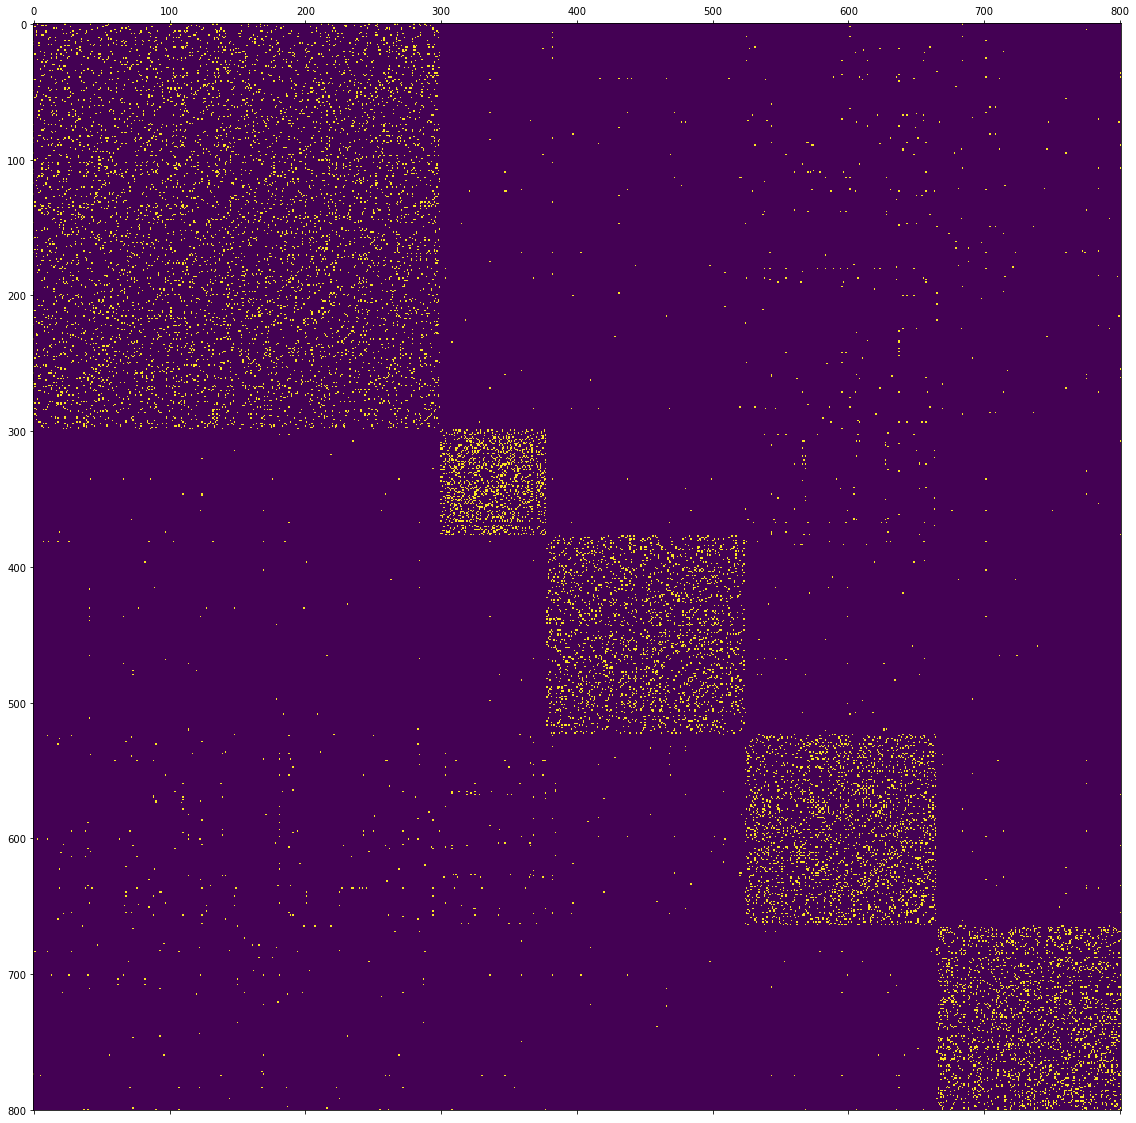

In [51]:
fig = plt.figure(figsize=(20, 20))
l=(res_genes["Adjacency"]>10**-3)
plt.matshow(l[id_genes][:, id_genes], fignum=0)
plt.show()

On this representation of the matrix $\mathbb{1}_{A_{ij}>\epsilon}$ with $A$ the adjacency matrix and $\epsilon=10^{-3}$ reorganised according to the true labels, we see that the algorithm learns somehow the main components.

In [52]:
print(np.sort(np.linalg.eigh(res_genes["Laplacian"])[0]))

[-1.16941070e-15 -7.45517627e-16 -2.42746341e-16 -1.00638333e-16
 -8.66481674e-17  5.49544217e-17  3.24997515e-16  4.34625439e-16
  6.44807372e-16  2.81048468e-02  3.67832069e-02  4.70220991e-02
  8.04089583e-02  1.49898127e-01  2.05908278e-01  2.30165665e-01
  3.61334250e-01  3.63305090e-01  3.71854706e-01  3.91821124e-01
  3.95479724e-01  4.17051267e-01  4.53532741e-01  4.58966923e-01
  4.87030307e-01  4.88657148e-01  5.22137675e-01  5.35366597e-01
  5.49536112e-01  5.55082961e-01  5.68544532e-01  5.73084454e-01
  5.84358659e-01  6.03146787e-01  6.16057777e-01  6.21544739e-01
  6.37159241e-01  6.40544925e-01  6.53499837e-01  6.56655797e-01
  6.65437401e-01  6.68882844e-01  6.84579243e-01  6.90984018e-01
  6.99203592e-01  7.01120311e-01  7.05621244e-01  7.10553150e-01
  7.13366520e-01  7.33692300e-01  7.38939675e-01  7.41053231e-01
  7.45809732e-01  7.56725413e-01  7.68474525e-01  7.73011636e-01
  7.87802633e-01  7.95264096e-01  8.03631580e-01  8.06610773e-01
  8.16272936e-01  8.26874

In [53]:
def connected_component(A):
    n=A.shape[0]
    cc=[-1]*n
    nbcc=0
    def parc(u,i,n):
        cc[u]=i
        for v in range(n):
            if A[u][v]>10**-7 and cc[v]==-1:
                parc(v,i,n)
    for u in range(n):
        if cc[u]==-1:
            parc(u,nbcc,n)
            nbcc+=1
    return cc        

In [54]:
cc=connected_component(l)

In [55]:
print(np.array(cc))
D=np.diagonal(res_genes["Laplacian"])
print(np.sort(D))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Unfortunately, as the sorted values of the laplacian diagonal show, these components correspond to single nodes, connected to no other node in the dataset.

## Realistic sensor displacement benchmark dataset

This part contains the experiments about the multivariate times series measuring body movements.

The data is available at https://archive.ics.uci.edu/ml/machine-learning-databases/00305/

To make the code work, download the dataset, extract it and save data and labels in the folder ./data/realistic_sensor_displacement/

In [56]:
from os import listdir
location = "data/realistic_sensor_displacement"
for filename in listdir(location)[:1]:
    file=(pd.read_csv(location+'/'+filename, skiprows=0, sep='\s+'))

In [57]:
l=file.values

print(l.shape)

(179809, 120)


In [58]:
l=l[:,2:-1]

We try to learn a laplacian while enforcing a $k$ components structure for its associated graph.

In [59]:
di=learn_k_component_graph(l.T,k=5,maxiter=1000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 575.84it/s]


Then, we plot the adjecency matrix, reorganised according to the coefficients of the second eigenvector of the laplacian, which could give a (very) rough estimation of the learned classes, according to spectral graph theory.

In [60]:
V=np.linalg.eigh(di["Laplacian"])[1]

In [61]:
ordre=np.argsort(V.T[1,:])

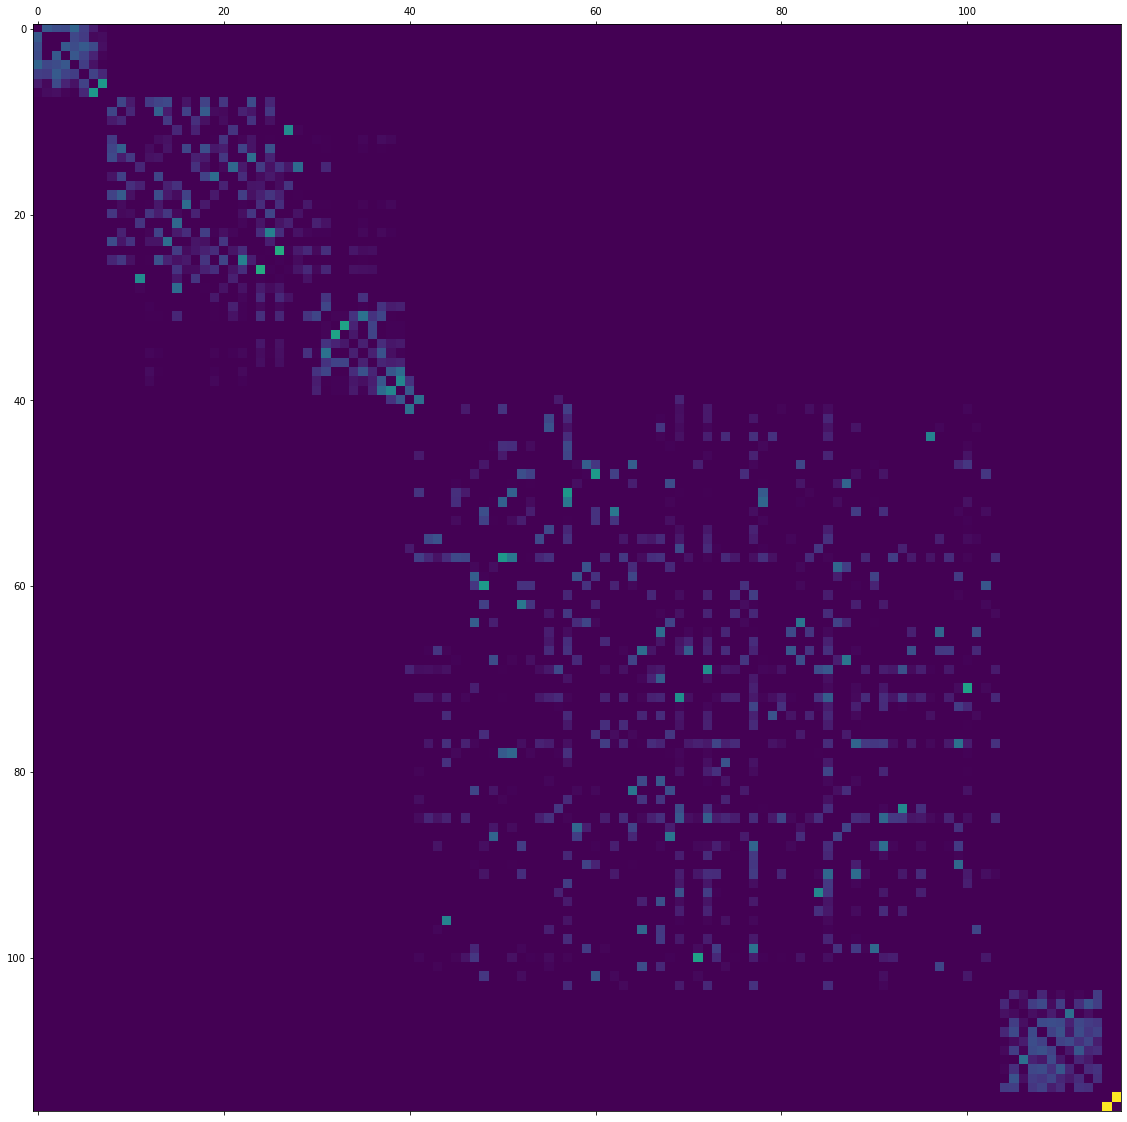

In [62]:
fig = plt.figure(figsize=(20, 20))
plt.matshow(di["Adjacency"][ordre][:,ordre], fignum=0)
plt.show()

We do not see any meaningful pattern in the matrix, showing that the graph learning has probably failed.

In [ ]:
print(di["convergence"])

In [63]:
print(np.sort(np.linalg.eigh(di["Laplacian"])[0])[:10])

[-1.41645225e-16 -9.25897903e-17  2.43494824e-16  2.50649522e-04
  5.91280128e-03  6.90802355e-02  9.53645176e-02  1.75576450e-01
  1.90560393e-01  2.12856344e-01]


We see that indeed, the algorithm didn't converge and the laplacian has only one zero eigenvalue.

Then, we try to use thresholding to enforce the smalest coefficients to go to zero and increase the number of components of the graph.

In [64]:
A=(di["Adjacency"])*(abs(di["Adjacency"])>10**-3)

In [65]:
L=A_to_L(A)

In [66]:
print(np.sort(np.linalg.eigh(L)[0])[:10])

[-6.84098919e-16 -1.65948263e-16 -6.78504511e-17  2.50647848e-04
  5.90722336e-03  6.86954526e-02  9.35966865e-02  1.73232008e-01
  1.89088793e-01  2.11772094e-01]


Unfortunately, the trick didn't work. We think that one explanation of this is because the data was not adapted to $k$-components graph learning 